In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Getting started

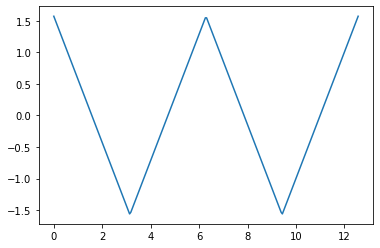

In [7]:
x = np.linspace(0, 4 * np.pi, 250)
y = np.arcsin(np.cos(x))

plt.plot(x, y)

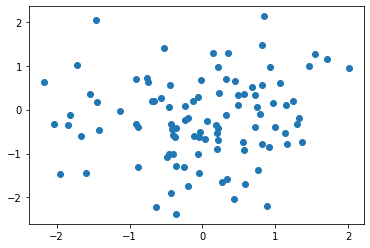

In [14]:
ix = np.random.randn(100)     # Gaussian distribution
iy = np.random.randn(100)     # Gaussian distribution

plt.scatter(ix, iy)

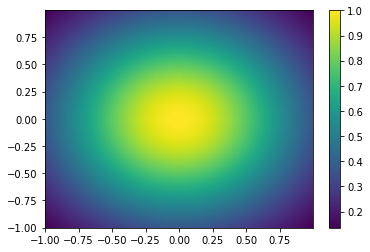

In [59]:
# make a two-dimensional grid of points (x, y)
x, y = np.mgrid[-1:1:0.005, -1:1:0.005]
# compute a bell curve (gaussian curve) at each point (x, y)
z = np.exp(-(x ** 2 + y ** 2))

# plot z as a color (heatmap)
# ... with x and y axes
plt.pcolor(x, y, z)
# add a colorbar for z
plt.colorbar()

# *** best practice ***: this function (pcolor) can be very slow for high resolution grids... i will show how to do this much faster


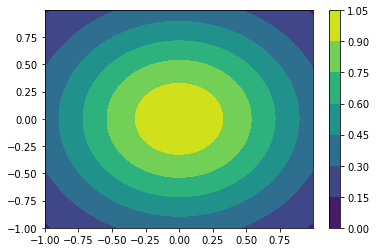

In [118]:
x, y = np.mgrid[-1:1:0.005, -1:1:0.005]
z = np.exp(-(x ** 2 + y ** 2))

plt.contourf(x, y, z)
plt.colorbar()

## Customizing pt. 1

keyword arguments (kwargs)

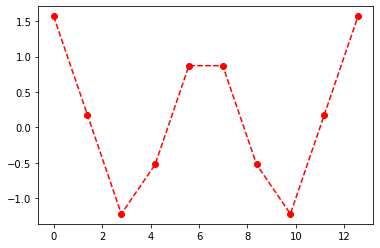

In [51]:
x = np.linspace(0, 4 * np.pi, 10)
y = np.arcsin(np.cos(x))

#       use red circles + dashed lines
#                ↓
#              -----
plt.plot(x, y, 'ro--')

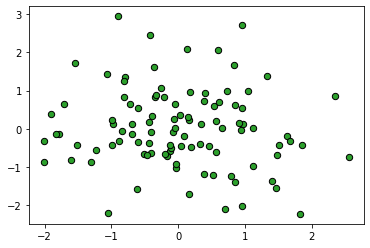

In [45]:
ix = np.random.randn(100)     # Gaussian distribution
iy = np.random.randn(100)     # Gaussian distribution

# standard color sequence:
# C0, C1, C2, C3, C4, C5, C6, C7, C8, C9

#                 specifying color        size
#                       ↓                  ↓
#                     ----                --
plt.scatter(ix, iy, c='C2', ec='black', s=40)
#                              -------
#                                  ↑
#                              edgecolor

# many more keyword arguments (kwargs): https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.plot.html

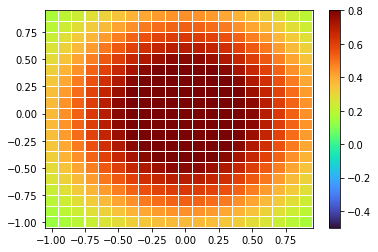

In [109]:
x, y = np.mgrid[-1:1:0.1, -1:1:0.1]
z = np.exp(-(x ** 2 + y ** 2))

#                   colormap (default: `viridis`)         edges properties (default: no edges)
#                           ↓                                ↓                ↓
#                         -----                           -------            ----
plt.pcolor(x, y, z, cmap='turbo', vmin=-0.5, vmax=0.8, ec='white', linewidth=0.01)
#                                     -----       ---
#                                       ↑          ↑
#                              specifying min and max of colorbar (default: min and max of data)
plt.colorbar()

# colormap options: https://matplotlib.org/stable/tutorials/colors/colormaps.html

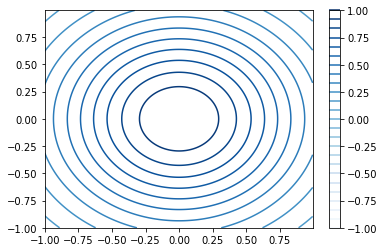

In [130]:
x, y = np.mgrid[-1:1:0.005, -1:1:0.005]
z = np.exp(-(x ** 2 + y ** 2))

#                      explicitly specifying levels of z where contours are
#                                      ↓
#                           ----------------------
plt.contour(x, y, z, levels=np.linspace(-1, 1, 25), cmap='Blues')
plt.colorbar()

## Customizing pt. 2

1. accessing axes *(this is a "best practice")*

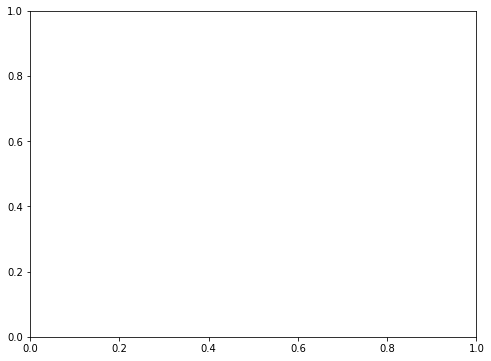

In [16]:
# create a figure and build axes (a/k/a subplot)
fig, ax = plt.subplots(figsize=(8, 6))
#                               ----
#                                 ↑
#                     size of the figure in inches (by default 100 pixels per inch, so this is 800 x 600)

# can also be done via:
#   fig = plt.figure(figsize=(8, 6))
#   ax = fig.add_subplot(111)

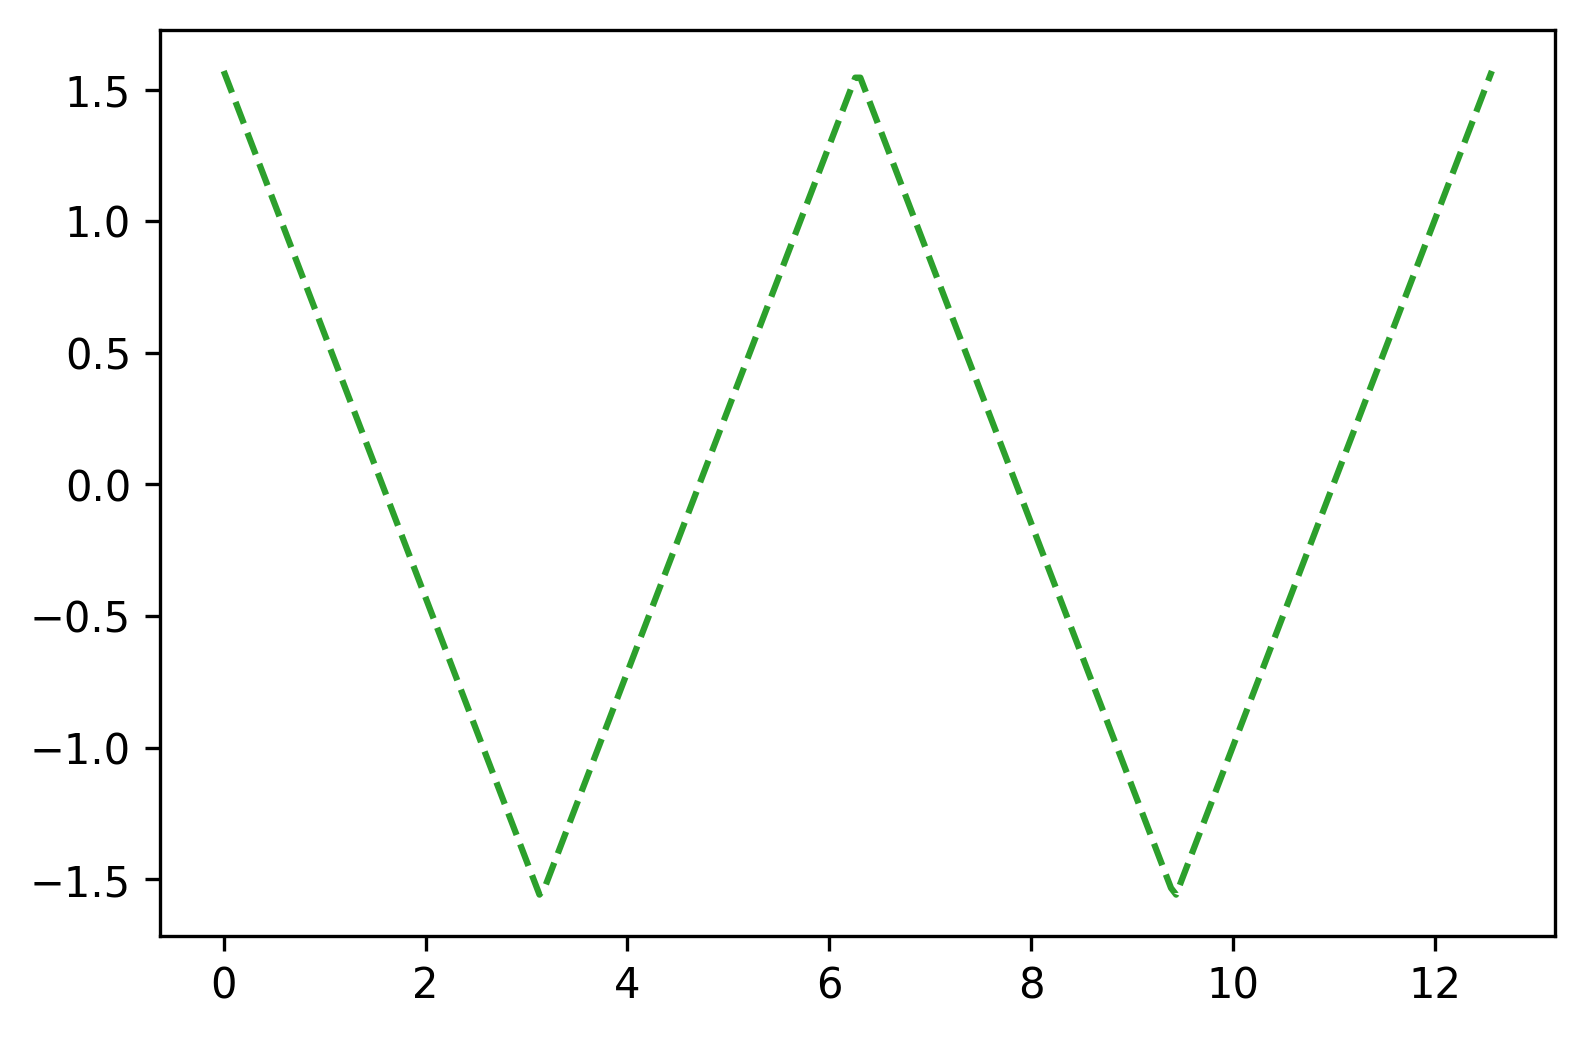

In [114]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=300)
#                                          ---
#                                           ↑
#                                  publication quality (300+ dpi)

# *** best practice ***: if this goes in the letter-size paper: aim for 8 inches in horizontal (full page paper) and 300+ ppi

x = np.linspace(0, 4 * np.pi, 250)
y = np.arcsin(np.cos(x))

# notice `ax.plot` here
ax.plot(x, y, 'C2--')

2. axes limits/labels/ticks

[Text(-3, 0, 'a'), Text(-1, 0, 'b'), Text(1, 0, 'c'), Text(3, 0, 'd')]

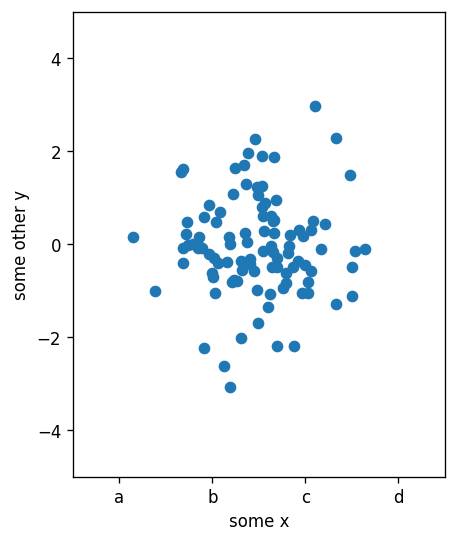

In [116]:
fig, ax = plt.subplots(figsize=(4, 6), dpi=120)

ix = np.random.randn(100)     # Gaussian distribution
iy = np.random.randn(100)     # Gaussian distribution

# notice `ax.plot` here
ax.scatter(ix, iy)

# *** best practice ***: always set aspect to 1 if two axes are conceptually related quantities
ax.set_aspect(1)

# axes limits
ax.set_xlim(-4, 4)
ax.set_ylim(-5, 5)

# axes labels
ax.set_xlabel("some x")
ax.set_ylabel("some other y")

# axes ticks (rarely used)
ax.set_xticks([-3, -1, 1, 3])
ax.set_xticklabels(["a", "b", "c", "d"])


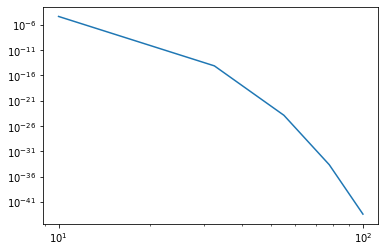

In [140]:
# it's actually better to use logarithmically spaced x
x = np.linspace(10, 100, 5)
# x = np.logspace(1, 2, 5)
y = np.exp(-x)

plt.plot(x, y)

# log-log scale
plt.xscale('log')
plt.yscale('log')

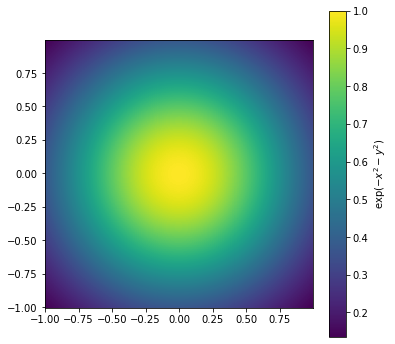

In [142]:
fig, ax = plt.subplots(figsize=(6, 6))
x, y = np.mgrid[-1:1:0.005, -1:1:0.005]
z = np.exp(-(x ** 2 + y ** 2))

ax.set_aspect(1)
img = ax.pcolor(x, y, z)
#                       colorbars can (should) have labels!
#                                 ↓
#                        -------------------
plt.colorbar(img, label="$\exp(-x^2 - y^2)$")
#            ---
#             ↑
#    need to explicity specify the "object"


### Best practices

1. Always use `set_aspect(1)` if `x` and `y` have the same conceptual meaning (e.g., same physical units);
2. label the axes;
3. keep plots simple and informative: if you can remove some feature (e.g., edges of points, dashing of the line, etc) and it still makes total sense -- then remove it;
4. keep sizes of ticks and labels reasonably large/small (1/5-1/6 of the whole figure);
5. use the right plot to send the message (e.g., barplot vs scatter, scatter vs plot, contour vs pcolor, etc);
6. choose the proper colormap (e.g., diverging vs non-diverging).

For more conceptual advices see Tufte's "The Visual Display of Quantitative Information" 1983 book (way-way-way ahead of its time).